In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit
%matplotlib inline

In [2]:
### import data of simulation 1 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_1,m1_1,m2_1,x_1,y_1,z_1,vx_1,vy_1,vz_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
### import data of simulation 2 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_2,m1_2,m2_2,x_2,y_2,z_2,vx_2,vy_2,vz_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
### import data of simulation 1 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,m1_wo_1,m2_wo_1,x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,9,10,29,30,31,32,33,34), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### import data of simulation 2 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,m1_wo_2,m2_wo_2,x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2,=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [6]:
### load radii, actions, half light and half mass radii for simulations ###
r3d_1,J_phi_1,J_theta_1,J_r_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH1.txt')
r3d_2,J_phi_2,J_theta_2,J_r_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH2.txt')
r3d_wo_1,J_phi_wo_1,J_theta_wo_1,J_r_wo_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH1.txt')
r3d_wo_2,J_phi_wo_2,J_theta_wo_2,J_r_wo_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH2.txt')
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2=np.loadtxt('half_mass_and_half_light_radius')

In [7]:
### initialize orbit class ###

bh_orbit_1=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m1_1[0]+m2_1[0])
bh_orbit_2=GCorbit(inputfilename='densityfile_IMBH2.txt',bhmass_M_sun=m1_2[0]+m2_2[0])
wobh_orbit_1=GCorbit(inputfilename='densityfile_noIMBH1.txt')
wobh_orbit_2=GCorbit(inputfilename='densityfile_noIMBH2.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [8]:
### loads guiding star radii for every star of both simulations ###
r_guide_bh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH1.txt',unpack='True')
r_guide_bh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH2.txt',unpack='True')
r_guide_wobh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH1.txt',unpack='True')
r_guide_wobh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH2.txt',unpack='True')


In [ ]:
per_1=np.zeros(len(r_3d_1[1:]))
per_2=np.zeros(len(r_3d_2[1:]))
per_wo_1=np.zeros(len(r_3d_wo_1[1:]))
per_wo_2=np.zeros(len(r_3d_wo_2[1:]))

r_3d_1=r_3d_1[1:]
r_3d_2=r_3d_2[1:]
x_1=x_1[1:]
x_2=x_2[1:]
y_1=y_1[1:]
y_2=y_2[1:]
z_1=z_1[1:]
z_2=z_2[1:]
vx_1=vx_1[1:]
vx_2=vx_2[1:]
vy_1=vy_1[1:]
vy_2=vy_2[1:]
vz_1=vz_1[1:]
vz_2=vz_2[1:]

In [ ]:
for i in range(len(r_3d_1[1:])):
    per_1[i]=bh_orbit_1.periapocenter(r_3d_1[i],x_1[i],y_1[i],z_1[i],vx_1[i],vy_1[i],vz_1[i])[0]
for i in range(len(r_3d_2[1:])):
    per_2[i]=bh_orbit_2.periapocenter(r_3d_2[i],x_2[i],y_2[i],z_2[i],vx_2[i],vy_2[i],vz_2[i])[0]
for i in range(len(r_3d_wo_1[1:])):
    per_wo_1[i]=wobh_orbit_1.periapocenter(r_3d_wo_1[i],x_wo_1[i],y_wo_1[i],z_wo_1[i],vx_wo_1[i],vy_wo_1[i],vz_wo_1[i])[0]
for i in range(len(r_3d_wo_2[1:])):
    per_wo_2[i]=wobh_orbit_2.periapocenter(r_3d_wo_2[i],x_wo_2[i],y_wo_2[i],z_wo_2[i],vx_wo_2[i],vy_wo_2[i],vz_wo_2[i])[0]

In [ ]:
np.savetxt('../Dokumente/Bachelorarbeit-2/per_IMBH1.txt',(per_1))
np.savetxt('../Dokumente/Bachelorarbeit-2/per_IMBH2.txt',(per_2))
np.savetxt('../Dokumente/Bachelorarbeit-2/per_noIMBH1.txt',(per_wo_1))
np.savetxt('../Dokumente/Bachelorarbeit-2/per_noIMBH2.txt',(per_wo_2))


In [8]:
### sorts action arrays as guiding star radius array is sorted ###

#with IMBH 1
r_guide_bh_argsort_1=np.argsort(r_guide_bh_1)
r_guide_bh_sort_1=r_guide_bh_1[r_guide_bh_argsort_1]
J_r_bh_sort_1=J_r_1[r_guide_bh_argsort_1]
J_theta_bh_sort_1=J_theta_1[r_guide_bh_argsort_1]
J_phi_bh_sort_1=J_phi_1[r_guide_bh_argsort_1]

NameError: name 'r_guide_bh_1' is not defined

#with IMBH 2
r_guide_bh_argsort_2=np.argsort(r_guide_bh_2)
r_guide_bh_sort_2=r_guide_bh_2[r_guide_bh_argsort_2]
J_r_bh_sort_2=J_r_2[r_guide_bh_argsort_2]
J_theta_bh_sort_2=J_theta_2[r_guide_bh_argsort_2]
J_phi_bh_sort_2=J_phi_2[r_guide_bh_argsort_2]

#without IMBH 1
r_guide_wobh_argsort_1=np.argsort(r_guide_wobh_1)
r_guide_wobh_sort_1=r_guide_wobh_1[r_guide_wobh_argsort_1]
J_r_wobh_sort_1=J_r_wo_1[r_guide_wobh_argsort_1]
J_theta_wobh_sort_1=J_theta_wo_1[r_guide_wobh_argsort_1]
J_phi_wobh_sort_1=J_phi_wo_1[r_guide_wobh_argsort_1]

#without IMBH 2
r_guide_wobh_argsort_2=np.argsort(r_guide_wobh_2)
r_guide_wobh_sort_2=r_guide_wobh_2[r_guide_wobh_argsort_2]
J_r_wobh_sort_2=J_r_wo_2[r_guide_wobh_argsort_2]
J_theta_wobh_sort_2=J_theta_wo_2[r_guide_wobh_argsort_2]
J_phi_wobh_sort_2=J_phi_wo_2[r_guide_wobh_argsort_2]

In [9]:
E_1 = bh_orbit_1.energy(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])
k_1_test=E_1<-0.4e-23
l_1_test=J_r_1>500
l=np.flatnonzero(k_1_test+l_1_test)
l=l+1

In [10]:
print(k_1_test)
print(l_1_test)
print(l)

[ True  True  True ..., False False False]
[False False False ...,  True  True  True]
[      1       2       3       5       7       8       9      11      12
      13      14      15      17      21      22      23      24      25
      27      30      33      37      39      40      42      45      46
      48      56      57      60      64      67      70      74      77
     107     110 1026681 1026688 1026689 1026690 1026691 1026692 1026693
 1026694 1026695 1026697 1026698 1026699 1026700 1026701 1026702 1026703
 1026704 1026705 1026706 1026707 1026708 1026709 1026710 1026711 1026712
 1026713 1026714 1026715 1026716 1026717 1026718 1026719 1026720 1026721
 1026722 1026723 1026724 1026725 1026726 1026727 1026728 1026729 1026730
 1026731 1026732 1026733 1026734]


17 0.00928405 0.009596408775989397
-3.60707407895e-24 0.289519541857
1026692 72.1396 72.42549968338338
-2.25607650167e-25 527.380113355


/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


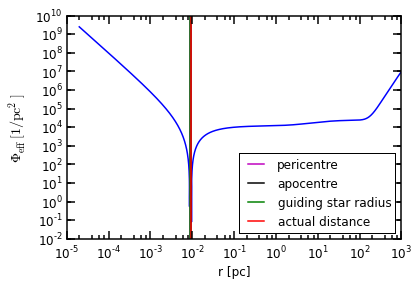

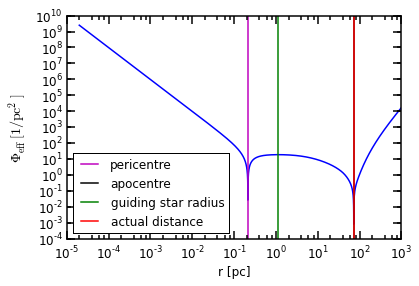

In [12]:
#l=np.array((67,886,1565,7892,30986,79073,107836))
l=np.array((17,1026692))
text=np.array(('group1','group2'))
for k in range(len(l)):
    L=bh_orbit_1.angularmom(x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[0]
    E=bh_orbit_1.energy(x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    #print(bh_orbit_1._periapocenter_aux(1e-7,E,L),bh_orbit_1._periapocenter_aux(r_3d_1[l[k]],E,L),bh_orbit_1._periapocenter_aux(np.sqrt(x_1[l[k]]**2+y_1[l[k]]**2+z_1[l[k]]**2),E,L),bh_orbit_1._periapocenter_aux(np.max(bh_orbit_1._r_bin)*1.03,E,L))
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.loglog(r,np.abs(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L)),linewidth=1.5)
    ax.set_xlabel('r [pc]',fontsize=12)
    ax.set_ylabel('$\Phi_\mathrm{eff}\ [1/\mathrm{pc}^2]$',fontsize=14)
    print(l[k],r_3d_1[l[k]],bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[1])
    print(E_1[l[k]],J_r_1[l[k]])
    ax.axvline(bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[0], color='m',label='pericentre',linewidth=1.5)
    ax.axvline(bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[1], color='black',label='apocentre',linewidth=1.5)
    ax.axvline(bh_orbit_1.r_guide_min(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]]),color='g',label='guiding star radius',linewidth=1.5)
    ax.axvline(r_3d_1[l[k]],color='r',label='actual distance',linewidth=1.5)    
    ax.legend(loc=0)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)

    ax.tick_params(length=8,width=1.5,labelsize=12)
    ax.tick_params(which='minor',length=4,width=1.5)
    fig.savefig('../Bachelorarbeit-Entwurf/Plots/pot_eff_'+text[k]+'.pdf',format='pdf',bbbox_inches='tight')
    fig.show()

l=np.array((67,886,1565,7892,30986,79073,107836))
for k in range(len(l)):
    L=bh_orbit_2.angularmom(x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[0]
    E=bh_orbit_2.energy(x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(bh_orbit_2._periapocenter_aux(1e-7,E,L),bh_orbit_2._periapocenter_aux(r_3d_2[l[k]],E,L),bh_orbit_2._periapocenter_aux(np.sqrt(x_2[l[k]]**2+y_2[l[k]]**2+z_2[l[k]]**2),E,L),bh_orbit_2._periapocenter_aux(np.max(bh_orbit_2._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(bh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    print(r_3d_2[l[k]],np.sqrt(x_2[l[k]]**2+y_2[l[k]]**2+z_2[l[k]]**2))
    plt.axvline(r_3d_2[l[k]],color='r',label='actual distance')
    plt.axvline(bh_orbit_2.periapocenter(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[0], color='m',label='pericentre')
    plt.axvline(bh_orbit_2.periapocenter(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[1], color='black',label='apocentre')
    plt.axvline(bh_orbit_2.r_guide(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    plt.show()

l=np.array((67,886,1565,7892,30986,79073,107836))
for k in range(len(l)):
    L=wobh_orbit_1.angularmom(x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[0]
    E=wobh_orbit_1.energy(x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(wobh_orbit_1._periapocenter_aux(1e-7,E,L),wobh_orbit_1._periapocenter_aux(r_3d_wo_1[l[k]],E,L),wobh_orbit_1._periapocenter_aux(np.sqrt(x_wo_1[l[k]]**2+y_wo_1[l[k]]**2+z_wo_1[l[k]]**2),E,L),wobh_orbit_1._periapocenter_aux(np.max(wobh_orbit_1._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(wobh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    print(r_3d_wo_1[l[k]],np.sqrt(x_wo_1[l[k]]**2+y_wo_1[l[k]]**2+z_wo_1[l[k]]**2))
    plt.axvline(r_3d_wo_1[l[k]],color='r',label='actual distance')
    plt.axvline(wobh_orbit_1.periapocenter(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[0], color='m',label='pericentre')
    plt.axvline(wobh_orbit_1.periapocenter(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[1], color='black',label='apocentre')
    plt.axvline(wobh_orbit_1.r_guide(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    plt.show()

In [51]:
blob_sort_wo_2=(0.2<r_guide_wobh_2)*(r_guide_wobh_2<0.3) 
r3d_blobsort_wo_2=r3d_wo_2[blob_sort_wo_2]
J_r_blobsort_wo_2=J_r_wo_2[blob_sort_wo_2]#
test_x=np.flatnonzero(blob_sort_wo_2)


l=test
for k in range(len(test_x)):
    L=wobh_orbit_2.angularmom(x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])[0]
    E=wobh_orbit_2.energy(x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(E,L,r)
    #print(wobh_orbit_2._periapocenter_aux(1e-7,E,L),wobh_orbit_2._periapocenter_aux(r_3d_wo_2[l[k]],E,L),wobh_orbit_2._periapocenter_aux(np.sqrt(x_wo_2[l[k]]**2+y_wo_2[l[k]]**2+z_wo_2[l[k]]**2),E,L),wobh_orbit_2._periapocenter_aux(np.max(wobh_orbit_2._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(wobh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    #print(r_3d_wo_2[l[k]],np.sqrt(x_wo_2[l[k]]**2+y_wo_2[l[k]]**2+z_wo_2[l[k]]**2))
    plt.axvline(r_3d_wo_2[test_x[k]],color='r',label='actual distance')
    plt.axvline(wobh_orbit_2.periapocenter(r_3d_wo_2[test_x[k]],x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])[0], color='m',label='pericentre')
    plt.axvline(wobh_orbit_2.periapocenter(r_3d_wo_2[test_x[k]],x_wo_2[test_x[k]],y_wo_2[l[k]],z_wo_2[l[k]],vx_wo_2[l[k]],vy_wo_2[l[k]],vz_wo_2[l[k]])[1], color='black',label='apocentre')
    plt.axvline(wobh_orbit_2.r_guide(r_3d_wo_2[l[k]],x_wo_2[l[k]],y_wo_2[l[k]],z_wo_2[l[k]],vx_wo_2[l[k]],vy_wo_2[l[k]],vz_wo_2[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    print(k)
    plt.show()

In [ ]:
len(np.abs(wobh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))

In [42]:
len(r)

10000

In [43]:
len(np.abs(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))

1

In [26]:
print(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L))
print(np.min(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))

[  2.49989157e+09   9.75713499e+06   2.59748444e+06 ...,   1.27849164e+01
   1.27875550e+01   1.27901935e+01]
-5.02574415137


-1.88081742822e-24


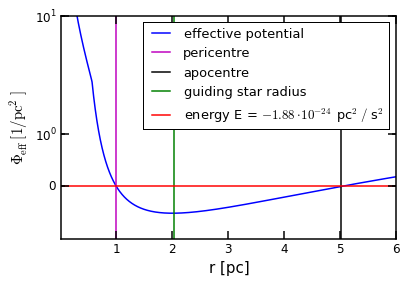

In [25]:
k=462893
L=bh_orbit_1.angularmom(x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k])[0]
E=bh_orbit_1.energy(x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k])
r=np.logspace(-4,3.,10000)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(r,bh_orbit_1._periapocenter_aux(r=r,E=E,L=L),label='effective potential',linewidth=1.5)
ax.set_xlim(0.01,6)
ax.set_ylim(-1e0,1e1)
ax.set_xlabel('r [pc]',fontsize=15)
ax.set_ylabel('$\Phi_\mathrm{eff}\ [1/\mathrm{pc}^2]$',fontsize=15)
ax.set_yscale('symlog')
#print(l[k],r_3d_1[l[k]],bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[1])
#print(E_1[l[k]],J_r_1[l[k]])
ax.axvline(bh_orbit_1.periapocenter(r_3d_1[k],x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k])[0], color='m',label='pericentre',linewidth=1.5)
ax.axvline(bh_orbit_1.periapocenter(r_3d_1[k],x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k])[1], color='black',label='apocentre',linewidth=1.5)
ax.axvline(bh_orbit_1.r_guide_root(r_3d_1[k],x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k]),color='g',label='guiding star radius',linewidth=1.5)
#ax.axvline(r_3d_1[l[k]],color='r',label='actual distance',linewidth=1.5)    
print(E)
ax.axhline(E,label='energy E = $-1.88 \cdot 10^{-24}$ pc$^2/$ s$^2$',c='r',linewidth=1.5)
ax.legend(loc=0,fontsize=13)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
#fig.savefig('../Bachelorarbeit-Entwurf/Plots/pot_eff_theory_part.pdf',format='pdf',bbox_inches='tight')
#fig.show()